In [83]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import scipy

In [33]:
data = pd.read_csv("./data/merged_data.csv")
data.head()

,Unnamed: 0,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [34]:
data= data.drop(columns=['Unnamed: 0'])

In [35]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [36]:
data.head()

,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,chroma_cens7,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,0.229743,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,0.231823,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,0.234724,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,0.308826,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,0.212070,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [37]:
#explore data
print(f'Number of variables - {data.shape[1]}\n')
print(f'Data Types for each variable - \n{data.dtypes}\n')
print(f'Number of variables for each data type - \n{data.dtypes.value_counts()}')

Number of variables - 77

Data Types for each variable - 
track_id          int64
genre            object
title            object
chroma_cens1    float64
chroma_cens2    float64
                 ...   
tonnetz3        float64
tonnetz4        float64
tonnetz5        float64
tonnetz6        float64
zcr1            float64
Length: 77, dtype: object

Number of variables for each data type - 
float64    74
object      2
int64       1
dtype: int64


In [38]:
#search missing data
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/data.shape[0]:.2f} %')
    if (null_co*100/data.shape[0]) > 0:
      col = column 
      data[data.isnull().any(axis=1)][[col]]

Null count for Columns - 
Series([], dtype: int64)




In [39]:
data = data.dropna()

In [40]:
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

Series([], dtype: int64)


In [41]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(data.shape[0]-val)*100/data.shape[0]:.2f}')

track_id Percentage Boolean False Counts 0.00
genre Percentage Boolean False Counts 0.00
title Percentage Boolean False Counts 0.00
chroma_cens1 Percentage Boolean False Counts 0.03
chroma_cens2 Percentage Boolean False Counts 0.03
chroma_cens3 Percentage Boolean False Counts 0.03
chroma_cens4 Percentage Boolean False Counts 0.01
chroma_cens5 Percentage Boolean False Counts 0.01
chroma_cens6 Percentage Boolean False Counts 0.03
chroma_cens7 Percentage Boolean False Counts 0.01
chroma_cens8 Percentage Boolean False Counts 0.01
chroma_cens9 Percentage Boolean False Counts 0.01
chroma_cens10 Percentage Boolean False Counts 0.03
chroma_cens11 Percentage Boolean False Counts 0.03
chroma_cens12 Percentage Boolean False Counts 0.03
chroma_cqt1 Percentage Boolean False Counts 0.01
chroma_cqt2 Percentage Boolean False Counts 0.01
chroma_cqt3 Percentage Boolean False Counts 0.01
chroma_cqt4 Percentage Boolean False Counts 0.01
chroma_cqt5 Percentage Boolean False Counts 0.01
chroma_cqt6 Percenta

<AxesSubplot:xlabel='genre', ylabel='count'>

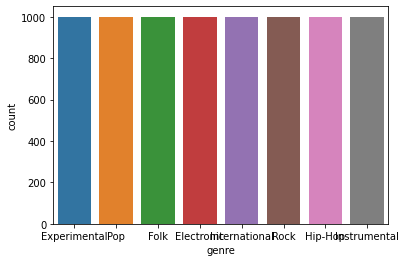

In [42]:
sns.countplot(x = 'genre', data = data)

In [43]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

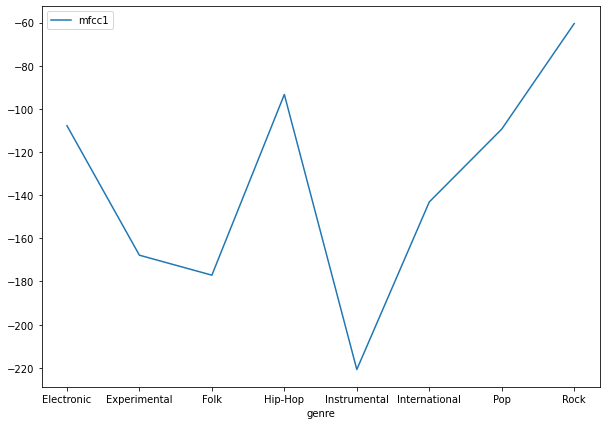

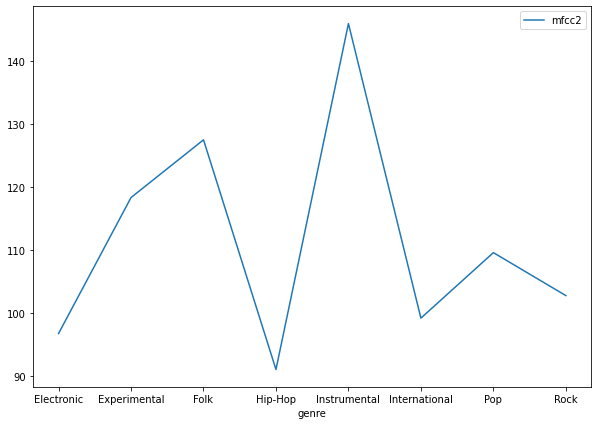

In [44]:
mean_features_data = data.groupby('genre').mean()
for feature in ['mfcc1', 'mfcc2']:
    ax = plt.gca()
    mean_features_data.reset_index().plot(kind='line',x='genre',y=feature,ax=ax, figsize = (10,7))
    plt.show()

In [45]:
data_new = data.drop(columns=['genre','title', 'track_id'])

In [46]:
#classification data splitting 
X_train,X_test, Y_train, Y_test = train_test_split(data_new.iloc[:,:], data['genre'], test_size = 0.2, random_state=1)

In [47]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6397 entries, 5418 to 5157
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         6397 non-null   float64
 1   chroma_cens2         6397 non-null   float64
 2   chroma_cens3         6397 non-null   float64
 3   chroma_cens4         6397 non-null   float64
 4   chroma_cens5         6397 non-null   float64
 5   chroma_cens6         6397 non-null   float64
 6   chroma_cens7         6397 non-null   float64
 7   chroma_cens8         6397 non-null   float64
 8   chroma_cens9         6397 non-null   float64
 9   chroma_cens10        6397 non-null   float64
 10  chroma_cens11        6397 non-null   float64
 11  chroma_cens12        6397 non-null   float64
 12  chroma_cqt1          6397 non-null   float64
 13  chroma_cqt2          6397 non-null   float64
 14  chroma_cqt3          6397 non-null   float64
 15  chroma_cqt4          6397 non-null 

In [48]:
# Explore test set
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 4739 to 6011
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         1600 non-null   float64
 1   chroma_cens2         1600 non-null   float64
 2   chroma_cens3         1600 non-null   float64
 3   chroma_cens4         1600 non-null   float64
 4   chroma_cens5         1600 non-null   float64
 5   chroma_cens6         1600 non-null   float64
 6   chroma_cens7         1600 non-null   float64
 7   chroma_cens8         1600 non-null   float64
 8   chroma_cens9         1600 non-null   float64
 9   chroma_cens10        1600 non-null   float64
 10  chroma_cens11        1600 non-null   float64
 11  chroma_cens12        1600 non-null   float64
 12  chroma_cqt1          1600 non-null   float64
 13  chroma_cqt2          1600 non-null   float64
 14  chroma_cqt3          1600 non-null   float64
 15  chroma_cqt4          1600 non-null 

**Standardize the data**

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification

## Random Forest

In [50]:
### Initial Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train_scaled,Y_train)

RandomForestClassifier(n_estimators=200)

In [52]:
Y_pred=clf.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
clf.feature_importances_

Accuracy: 0.49125


array([0.00955054, 0.00936835, 0.00959703, 0.00952763, 0.00991313,
       0.00937804, 0.00985905, 0.00920673, 0.00968422, 0.00984461,
       0.00973421, 0.00927347, 0.0106435 , 0.01066982, 0.01011137,
       0.0105497 , 0.01028293, 0.00941512, 0.00956248, 0.00970599,
       0.01019606, 0.01003438, 0.0099142 , 0.009735  , 0.01205341,
       0.0118722 , 0.01074096, 0.01220911, 0.01182515, 0.01149131,
       0.01126788, 0.01087891, 0.01250843, 0.01053467, 0.01361494,
       0.01139733, 0.02584905, 0.02044632, 0.02264179, 0.01759719,
       0.01629312, 0.0125751 , 0.01181312, 0.01349914, 0.01342845,
       0.01253312, 0.01425659, 0.01293623, 0.01422737, 0.0152596 ,
       0.01779293, 0.01666488, 0.01581255, 0.01307513, 0.01286073,
       0.01311543, 0.01994451, 0.02427457, 0.02216051, 0.01578829,
       0.02291908, 0.02357914, 0.02269735, 0.02367344, 0.01869978,
       0.01364319, 0.02254449, 0.01189284, 0.01160722, 0.00977458,
       0.00981652, 0.01070508, 0.01088408, 0.01656562])

### Cross Validation

In [53]:
cv_scores_dict = {}
criterion_list = ['gini', 'entropy']
for n_estimators in [200, 300,400,500]:
    cv_scores = []
    for criterion in criterion_list:    
        RM_model = RandomForestClassifier(n_estimators = n_estimators, criterion=criterion,random_state=1)
        cv_scores.append(np.mean(cross_val_score(RM_model, X_train_scaled, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_criterion = criterion_list[cv_scores.index(max_cv_score)]
    cv_scores_dict[n_estimators] = {'criterion': max_criterion, 'cv_score': max_cv_score, 'n_estimators': n_estimators}
print(cv_scores_dict)

{200: {'criterion': 'gini', 'cv_score': 0.48381968896713606, 'n_estimators': 200}, 300: {'criterion': 'gini', 'cv_score': 0.48304161776212834, 'n_estimators': 300}, 400: {'criterion': 'gini', 'cv_score': 0.4856954225352113, 'n_estimators': 400}, 500: {'criterion': 'gini', 'cv_score': 0.4872584115805947, 'n_estimators': 500}}


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(n_estimators=400,criterion='gini' ,random_state=1)
clf.fit(X_train_scaled,Y_train)

RandomForestClassifier(n_estimators=400, random_state=1)

[[0.48333333 0.08955224 0.03265306 0.16731518 0.07281553 0.05092593
  0.11409396 0.04694836]
 [0.07222222 0.5        0.05714286 0.01945525 0.16019417 0.09722222
  0.06711409 0.08450704]
 [0.02777778 0.01492537 0.54285714 0.0077821  0.10194175 0.0787037
  0.08724832 0.05164319]
 [0.15555556 0.02985075 0.00408163 0.54474708 0.02912621 0.0462963
  0.08724832 0.07981221]
 [0.03888889 0.14925373 0.11428571 0.01945525 0.45145631 0.0462963
  0.10738255 0.02347418]
 [0.09444444 0.05970149 0.07755102 0.09727626 0.03883495 0.47222222
  0.04697987 0.05633803]
 [0.1        0.1119403  0.11428571 0.07003891 0.07281553 0.15277778
  0.33557047 0.12206573]
 [0.02777778 0.04477612 0.05714286 0.07392996 0.07281553 0.05555556
  0.15436242 0.53521127]]


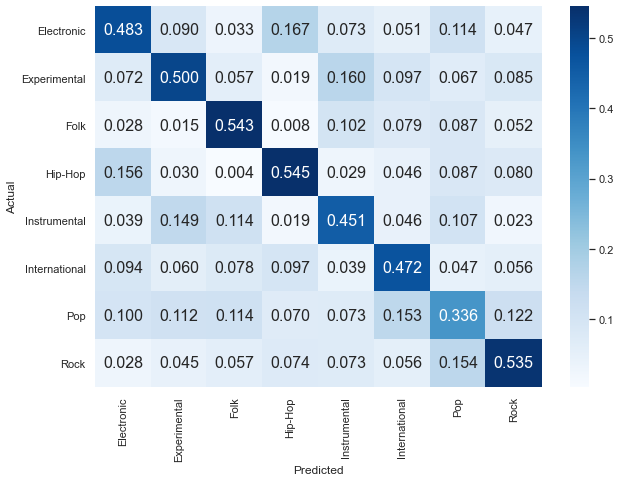

In [55]:
Y_pred=clf.predict(X_test_scaled)
conf_matrix = metrics.confusion_matrix(Y_test,Y_pred, normalize='pred')
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")
print(conf_matrix)

In [56]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
error = 1 - accuracy
precision = metrics.precision_score(Y_test, Y_pred, average = None)
recall = metrics.recall_score(Y_test, Y_pred, average = None)
F1_score = metrics.f1_score(Y_test, Y_pred, average = None)
print("Accuracy",accuracy,"\nError", error,"\nPrecision", precision,"\nRecall", recall,"\nF1_score", F1_score)

Accuracy 0.49125 
Error 0.50875 
Precision [0.48333333 0.5        0.54285714 0.54474708 0.45145631 0.47222222
 0.33557047 0.53521127] 
Recall [0.42857143 0.37016575 0.65196078 0.63926941 0.50543478 0.51515152
 0.24630542 0.54807692] 
F1_score [0.45430809 0.42539683 0.59242762 0.58823529 0.47692308 0.49275362
 0.28409091 0.5415677 ]


### Parameter variations

Sample size:  1000  Accuracy: 0.464375
Sample size:  2000  Accuracy: 0.474375
Sample size:  3000  Accuracy: 0.476875
Sample size:  4000  Accuracy: 0.49
Sample size:  5000  Accuracy: 0.485
Sample size:  6000  Accuracy: 0.490625


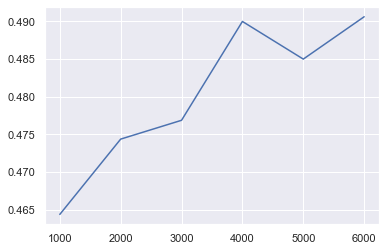

In [57]:
sample_size = [1000,2000,3000,4000,5000,6000]
accuracy=[]
for i in sample_size:
  clf=RandomForestClassifier(n_estimators=400,criterion='gini' ,random_state=1,max_samples=i)
  clf.fit(X_train_scaled,Y_train)
  Y_pred=clf.predict(X_test_scaled)
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
  print("Sample size: ",i," Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

plt.plot(sample_size, accuracy)

Max Leaf Node:  200  Accuracy: 0.475
Max Leaf Node:  400  Accuracy: 0.478125
Max Leaf Node:  600  Accuracy: 0.486875
Max Leaf Node:  800  Accuracy: 0.484375
Max Leaf Node:  1000  Accuracy: 0.48875
Max Leaf Node:  1200  Accuracy: 0.489375


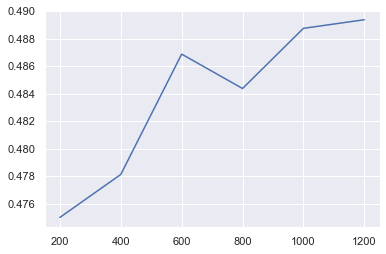

In [58]:
max_leaf_nodes = [200,400,600,800,1000,1200]
accuracy=[]
for i in max_leaf_nodes:
  clf=RandomForestClassifier(n_estimators=400,criterion='gini' ,random_state=1,max_leaf_nodes=i)
  clf.fit(X_train_scaled,Y_train)
  Y_pred=clf.predict(X_test_scaled)
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
  print("Max Leaf Node: ",i," Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

plt.plot(max_leaf_nodes, accuracy)

Max Features:  10  Accuracy: 0.4925
Max Features:  20  Accuracy: 0.49375
Max Features:  30  Accuracy: 0.48875
Max Features:  40  Accuracy: 0.49125
Max Features:  50  Accuracy: 0.49125
Max Features:  60  Accuracy: 0.490625
Max Features:  70  Accuracy: 0.48875


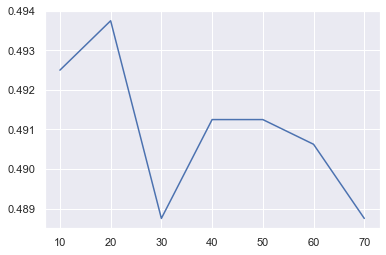

In [59]:
max_features = [10,20,30,40,50,60,70]
accuracy=[]
for i in max_features:
  clf=RandomForestClassifier(n_estimators=400,criterion='gini' ,random_state=1,max_features=i)
  clf.fit(X_train_scaled,Y_train)
  Y_pred=clf.predict(X_test_scaled)
  accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
  print("Max Features: ",i," Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

plt.plot(max_features, accuracy)

### Top Features

Feature ranking:
1. feature 36 (0.025757)
2. feature 57 (0.025126)
3. feature 60 (0.023938)
4. feature 61 (0.023540)
5. feature 63 (0.023112)
6. feature 66 (0.022981)
7. feature 38 (0.022482)
8. feature 58 (0.021857)
9. feature 62 (0.020815)
10. feature 37 (0.019751)
11. feature 56 (0.019747)
12. feature 50 (0.018076)
13. feature 64 (0.017752)
14. feature 39 (0.017023)
15. feature 73 (0.016704)
16. feature 51 (0.016564)
17. feature 59 (0.016244)
18. feature 52 (0.015798)
19. feature 40 (0.015560)
20. feature 49 (0.015183)
21. feature 48 (0.014088)
22. feature 34 (0.014047)
23. feature 65 (0.013770)
24. feature 55 (0.013615)
25. feature 44 (0.013575)
26. feature 46 (0.013463)
27. feature 43 (0.013447)
28. feature 53 (0.013067)
29. feature 47 (0.013058)
30. feature 27 (0.012705)
31. feature 45 (0.012684)
32. feature 54 (0.012670)
33. feature 32 (0.012476)
34. feature 41 (0.012303)
35. feature 24 (0.012217)
36. feature 28 (0.012172)
37. feature 67 (0.012063)
38. feature 42 (0.011874)
39. 

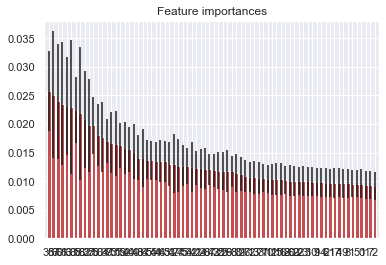

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = clf=RandomForestClassifier(n_estimators=400,criterion='gini',random_state=1)

forest.fit(X_train_scaled, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

## SVM

### Cross Validation

In [61]:
# Checking for linear and rbf kernel
cv_scores_dict = {}
C_values = [0.01,0.1,1,5,10]
for kernel in ['linear', 'rbf']:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled, Y_train, cv=10, n_jobs=-1)))
    max_cv_score = max(cv_scores)
    if kernel in cv_scores_dict and cv_scores_dict[kernel]['cv_score']<max_cv_score:
        max_C_Value = C_values[cv_scores.index(max_cv_score)]
        cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score,}
    else:
        max_C_Value = C_values[cv_scores.index(max_cv_score)]
        cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score,}
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}}


In [62]:
# Checking for poylnomial kernel with different degrees
C_values = [0.01,0.1,1,5,10]
kernel = 'poly'
for degree in [2,3,4,5]:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c, degree= degree)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    if kernel in cv_scores_dict and cv_scores_dict[kernel]['cv_score']<max_cv_score:
        max_C_Value = C_values[cv_scores.index(max_cv_score)]
        cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score, 'degree': degree}
    else:
        max_C_Value = C_values[cv_scores.index(max_cv_score)]
        cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score, 'degree': degree}
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}, 'poly': {'C': 10, 'cv_score': 0.38033646322378717, 'degree': 5}}


In [63]:
#Training best performing model
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train_scaled, Y_train)
predicted_labels = svm_model.predict(X_test_scaled)

0.5325


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

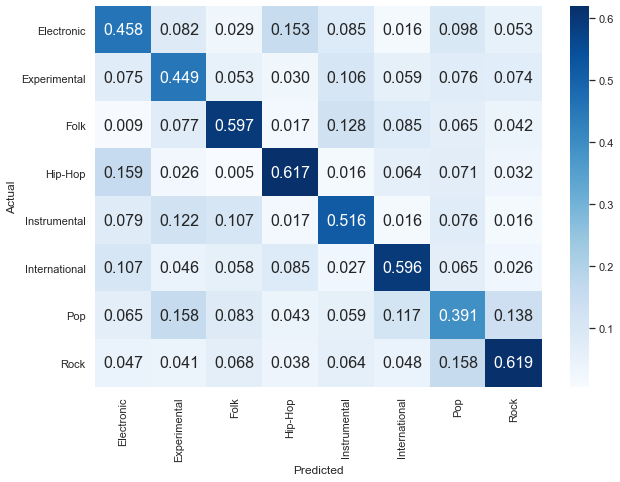

In [64]:
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(Y_test, predicted_labels, normalize='pred')
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

### Feature Selection

           Feature_Name       Score
57  spectral_bandwidth1  321.415397
66    spectral_rolloff1  304.706446
58   spectral_centroid1  265.988840
61   spectral_contrast3  261.504960
62   spectral_contrast4  258.677142
36                mfcc1  253.961528
37                mfcc2  252.070995
63   spectral_contrast5  249.653095
60   spectral_contrast2  240.169166
51               mfcc16  182.525809
49               mfcc14  162.937938
64   spectral_contrast6  160.490255
34        chroma_stft11  152.362421
47               mfcc12  145.616917
45               mfcc10  139.931224
32         chroma_stft9  135.734431
27         chroma_stft4  135.422010
43                mfcc8  130.695051
56                rmse1  126.532468
50               mfcc15  125.102781
25         chroma_stft2  123.612486
48               mfcc13  122.609271
29         chroma_stft6  120.045963
46               mfcc11  117.342093
53               mfcc18  113.390780
73                 zcr1  110.221439
30         chroma_stft7  108

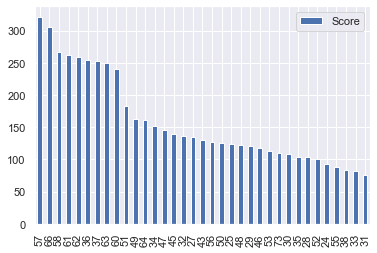

In [65]:
scores = f_classif(X_train_scaled, Y_train)[0]
df_scores = pd.DataFrame(scores)
df_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']
top_feature_scores = feature_scores.nlargest(35,'Score')
print(top_feature_scores)
top_feature_scores.plot(kind='bar')
plt.show()

In [66]:
#Getting Top Features Train and Test Dataset
X_train_selected_features = X_train[top_feature_scores['Feature_Name']]
X_test_selected_features = X_test[top_feature_scores['Feature_Name']]
scaler = StandardScaler()
scaler.fit(X_train_selected_features)
X_train_scaled_selected_features = scaler.transform(X_train_selected_features)
X_test_scaled_selected_features = scaler.transform(X_test_selected_features)

0.503125


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

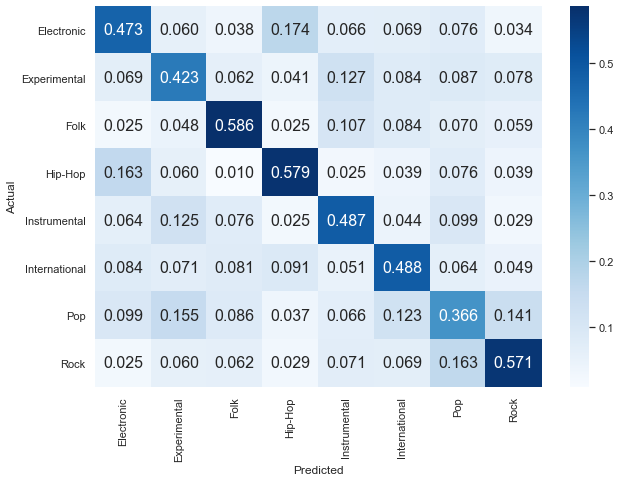

In [67]:
#Training best performing model with top features
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train_scaled_selected_features, Y_train)
predicted_labels = svm_model.predict(X_test_scaled_selected_features)
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(Y_test, predicted_labels, normalize='pred')
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

# Clustering

### Identify overlapping clusters

In [68]:
data_clustering = pd.read_csv("./data/merged_data.csv").drop(columns=['Unnamed: 0'])

In [69]:
data_clustering.columns

Index(['track_id', 'genre', 'title', 'chroma_cens1', 'chroma_cens2',
       'chroma_cens3', 'chroma_cens4', 'chroma_cens5', 'chroma_cens6',
       'chroma_cens7', 'chroma_cens8', 'chroma_cens9', 'chroma_cens10',
       'chroma_cens11', 'chroma_cens12', 'chroma_cqt1', 'chroma_cqt2',
       'chroma_cqt3', 'chroma_cqt4', 'chroma_cqt5', 'chroma_cqt6',
       'chroma_cqt7', 'chroma_cqt8', 'chroma_cqt9', 'chroma_cqt10',
       'chroma_cqt11', 'chroma_cqt12', 'chroma_stft1', 'chroma_stft2',
       'chroma_stft3', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6',
       'chroma_stft7', 'chroma_stft8', 'chroma_stft9', 'chroma_stft10',
       'chroma_stft11', 'chroma_stft12', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'rmse1', 'spectral_bandwidth1',
       'spectral_centroid1', 'spectral_contrast1', 'spectral_contrast2',
       'sp

In [70]:
data_clustering['chroma_cens_avg'] = data_clustering[['chroma_cens1', 'chroma_cens2', 'chroma_cens3', 'chroma_cens4',
       'chroma_cens5', 'chroma_cens6', 'chroma_cens7', 'chroma_cens8',
       'chroma_cens9', 'chroma_cens10', 'chroma_cens11', 'chroma_cens12']].mean(axis=1)

data_clustering = data_clustering.drop(columns=['chroma_cens1', 'chroma_cens2', 'chroma_cens3', 'chroma_cens4',
       'chroma_cens5', 'chroma_cens6', 'chroma_cens7', 'chroma_cens8',
       'chroma_cens9', 'chroma_cens10', 'chroma_cens11', 'chroma_cens12'])

data_clustering['chroma_cqt_avg'] = data_clustering[['chroma_cqt1', 'chroma_cqt2', 'chroma_cqt3', 'chroma_cqt4',
       'chroma_cqt5', 'chroma_cqt6', 'chroma_cqt7', 'chroma_cqt8',
       'chroma_cqt9', 'chroma_cqt10', 'chroma_cqt11', 'chroma_cqt12']].mean(axis=1)

data_clustering = data_clustering.drop(columns=['chroma_cqt1', 'chroma_cqt2', 'chroma_cqt3', 'chroma_cqt4',
       'chroma_cqt5', 'chroma_cqt6', 'chroma_cqt7', 'chroma_cqt8',
       'chroma_cqt9', 'chroma_cqt10', 'chroma_cqt11', 'chroma_cqt12'])

data_clustering['chroma_stft_avg'] = data_clustering[['chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4',
       'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft8',
       'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12']].mean(axis=1)

data_clustering = data_clustering.drop(columns=['chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4',
       'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft8',
       'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12'])

data_clustering['spectral_contrast_avg'] = data_clustering[['spectral_contrast1',
       'spectral_contrast2', 'spectral_contrast3', 'spectral_contrast4',
       'spectral_contrast5', 'spectral_contrast6', 'spectral_contrast7']].mean(axis=1)

data_clustering = data_clustering.drop(columns=['spectral_contrast1',
       'spectral_contrast2', 'spectral_contrast3', 'spectral_contrast4',
       'spectral_contrast5', 'spectral_contrast6', 'spectral_contrast7'])

data_clustering = data_clustering.drop(columns=['tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4',
       'tonnetz5', 'tonnetz6'])

In [71]:
data_clustering.head()

,track_id,genre,title,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc20,rmse1,spectral_bandwidth1,spectral_centroid1,spectral_rolloff1,zcr1,chroma_cens_avg,chroma_cqt_avg,chroma_stft_avg,spectral_contrast_avg
0,135054,Experimental,Hari Karl (for Larry Eisenberg),-284.673103,136.940830,-1.706287,46.987941,-4.991191,24.425244,-3.126049,...,-1.334874,1.968544,1389.195476,1270.517057,2571.502445,0.070002,0.271821,0.561447,0.497133,21.476695
1,135336,Pop,Slow and Steady,-99.957216,100.856206,19.690323,22.063842,14.831470,5.936942,-1.968519,...,3.010280,6.808776,2437.100979,2230.693570,4486.854020,0.085219,0.243045,0.445526,0.397641,21.229311
2,135337,Pop,The Dream and the Dreamer,-110.618921,89.579104,-10.634255,-5.660547,-6.602311,-21.095758,-21.917632,...,1.296346,5.291817,2368.194239,2284.877592,4382.598041,0.108170,0.246168,0.455258,0.240365,22.715981
3,135043,Folk,Babel,-140.360722,107.095759,14.577092,30.654562,7.088532,4.895010,11.492420,...,0.255368,3.660768,2367.205362,1969.056499,4162.319868,0.074080,0.253937,0.491335,0.338472,22.937072
4,135091,Experimental,Tree and Wind,-383.205631,34.632317,-49.995862,-47.216860,-53.404964,-42.121712,-21.026824,...,5.466673,0.739969,2215.744376,2356.188217,4653.557040,0.100463,0.216975,0.362044,0.184751,23.291432


In [72]:
X = data_clustering.drop(columns=['genre','title', 'track_id'])

In [73]:
from scipy.stats import pearsonr
import pandas as pd
# Function taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

k = calculate_pvalues(X)
k.to_csv("\pearson_coeff.csv", index=False)
k

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc20,rmse1,spectral_bandwidth1,spectral_centroid1,spectral_rolloff1,zcr1,chroma_cens_avg,chroma_cqt_avg,chroma_stft_avg,spectral_contrast_avg
mfcc1,0,0,0,0,0,0,0.0524,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mfcc2,0,0,0.0001,0,0,0,0.0118,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mfcc3,0,0.0001,0,0.0015,0,0,0,0,0,0,...,0,0.0062,0,0,0.4866,0,0,0,0,0
mfcc4,0,0,0.0015,0,0,0,0,0,0,0,...,0,0,0,0.1638,0.0679,0,0.5543,0.0762,0,0
mfcc5,0,0,0,0,0,0,0,0,0,0,...,0.0956,0,0.5421,0,0,0,0,0,0,0
mfcc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mfcc7,0.0524,0.0118,0,0,0,0,0,0,0,0,...,0,0,0,0,0.5225,0,0,0,0,0
mfcc8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0033,0,0,0,0
mfcc9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0028,0.0596,0,0
mfcc10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = X.drop(columns=['mfcc7', 'mfcc5', 'mfcc19', 'mfcc3', 'mfcc4'])

In [75]:
factor = pd.factorize(data_clustering['genre'])
print(factor[0])
data_clustering["genre_factorised"] = factor[0]

[0 1 1 ... 3 0 6]


In [76]:
Y = data_clustering['genre_factorised']

In [77]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [78]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

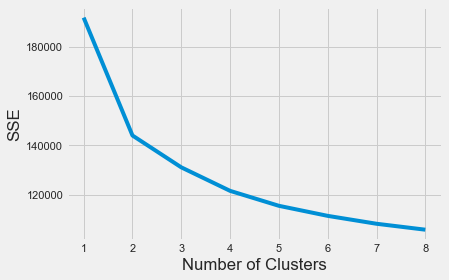

In [79]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 9), sse)
plt.xticks(range(1, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [80]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

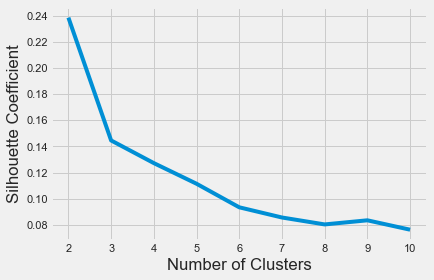

In [81]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

7997
[0 1 2 3 4 5 6 7]
0.24946855070651494


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

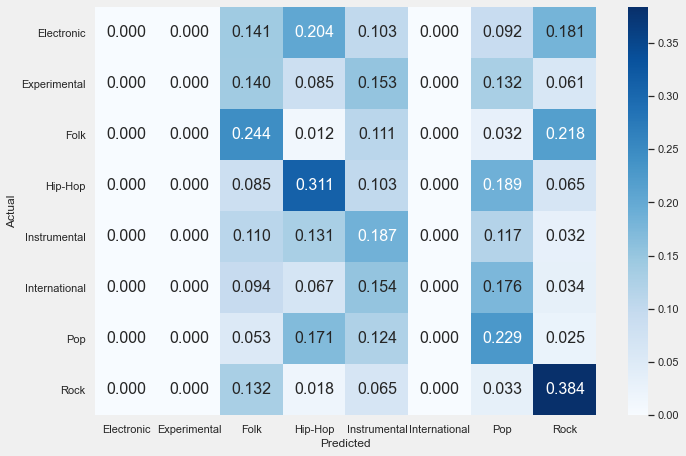

In [84]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0] 
        permutation.append(new_label)
    return permutation

X_k = X
print(len(X_k))
true_labels = data_clustering['genre']
len(true_labels)
scaler = StandardScaler()
scaler.fit(X_k)
X_scaled = scaler.transform(X_k)
clf = KMeans(n_clusters = 8, init='random')
clf.fit(X_k)
y_kmeans = clf.predict(X_k)
print(np.unique(clf.labels_))
permutation = find_permutation(8, true_labels, clf.labels_)
predicted_labels = [ permutation[label] for label in clf.labels_]
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)
labels = data_clustering.genre.unique()
confusion_mat_data = confusion_matrix(true_labels, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(true_labels), index = np.unique(true_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

### Kmeans clustering

In [85]:
#classification data splitting 
X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,:-1], data_clustering['genre_factorised'], test_size = 0.2, random_state=1)
n_clusters = 8
clf = KMeans(n_clusters = n_clusters, random_state=42)
clf.fit(X_train)
y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)


In [86]:
clusters = clf.labels_

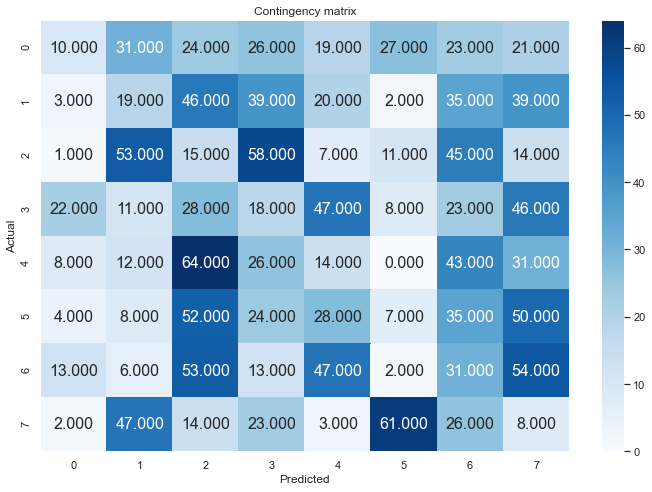

In [87]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(Y_test, y_labels_test)
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(cont_matrix, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [88]:
print(metrics.accuracy_score(Y_test, y_labels_test))

0.07625
